In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
dataset=fetch_california_housing()

In [4]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
X=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [6]:
y=pd.DataFrame(data=dataset.target, columns=['Target_price'])

In [7]:
df=pd.concat([X,y],axis=1)

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
df.isnull().sum()

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
Target_price    0
dtype: int64

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target_price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target_price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


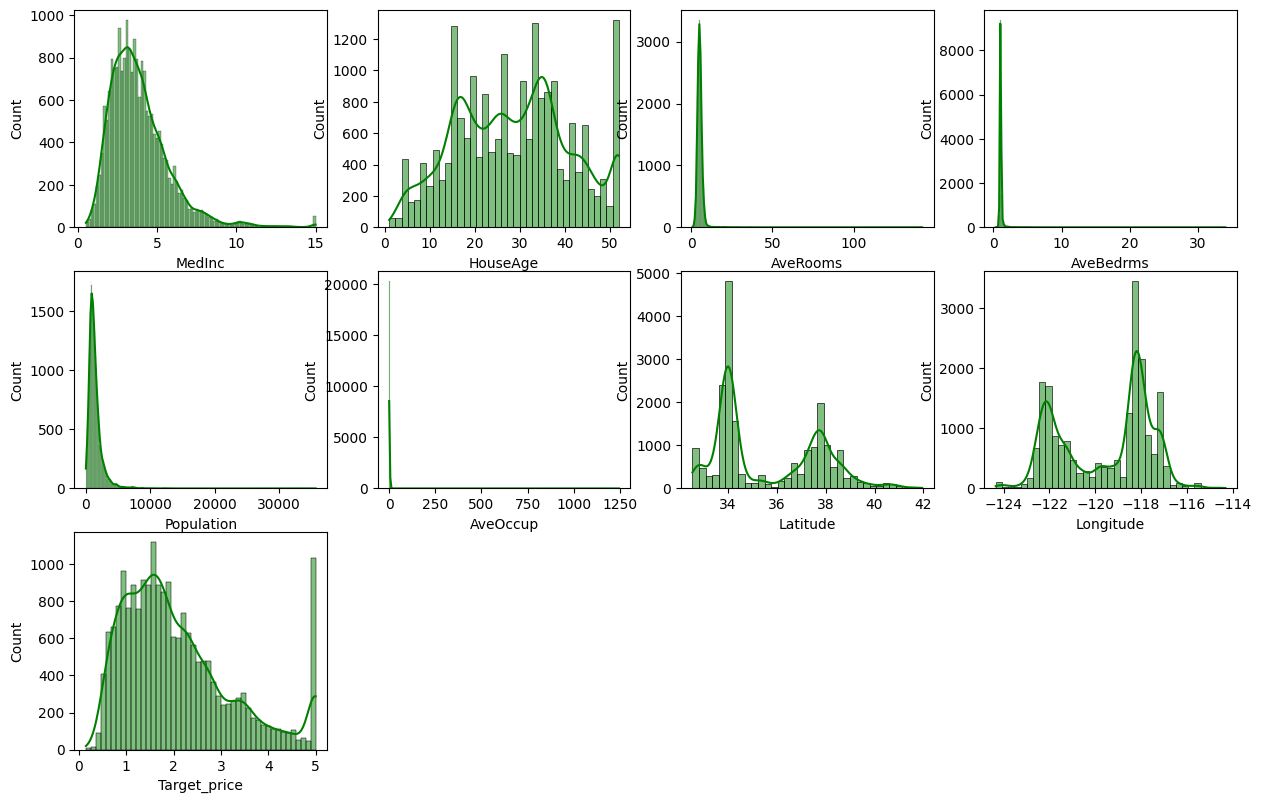

In [12]:
plt.figure(figsize=(15,13))
for i in range(0,len(df.columns)):
    plt.subplot(4,4,i+1)
    sns.histplot(x=df[df.columns[i]],kde=True,color='green',alpha=0.5)

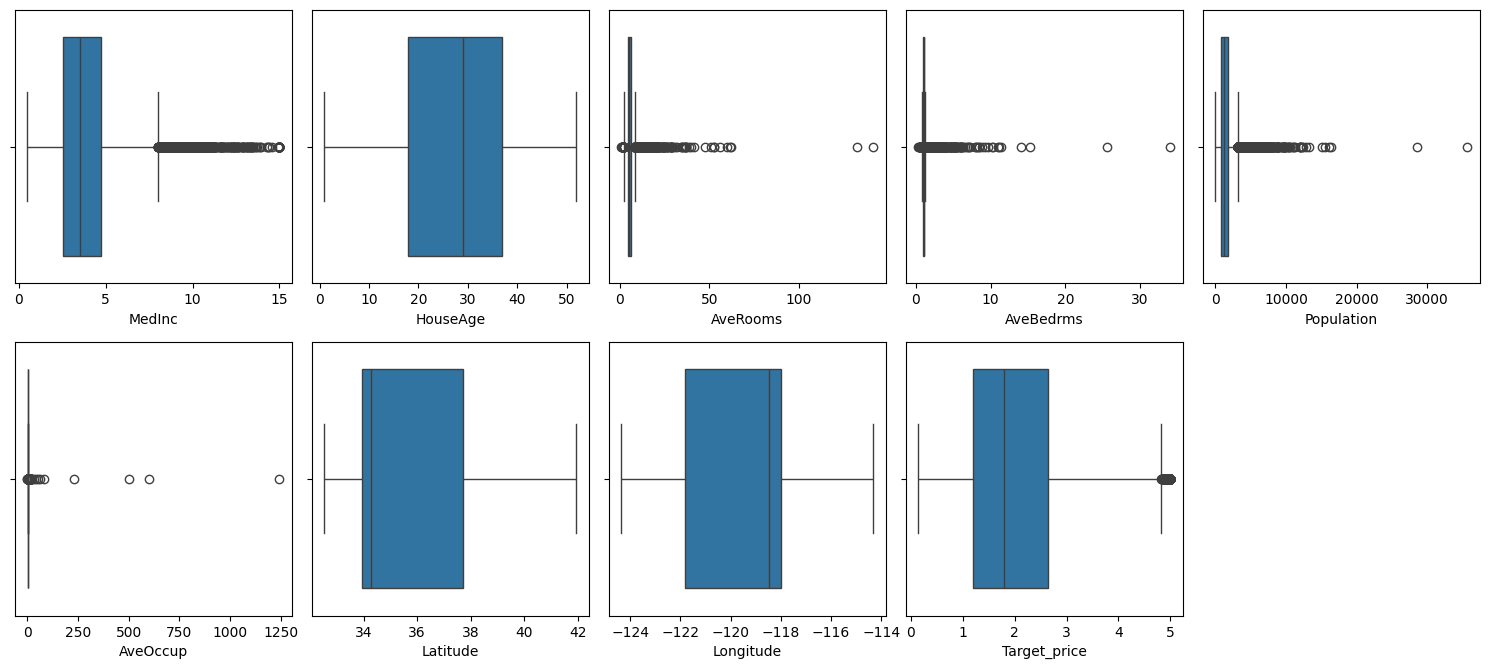

In [13]:
plt.figure(figsize=(15,13))
for i in range(0, len(df.columns)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x=df[df.columns[i]])

plt.tight_layout()
plt.show()

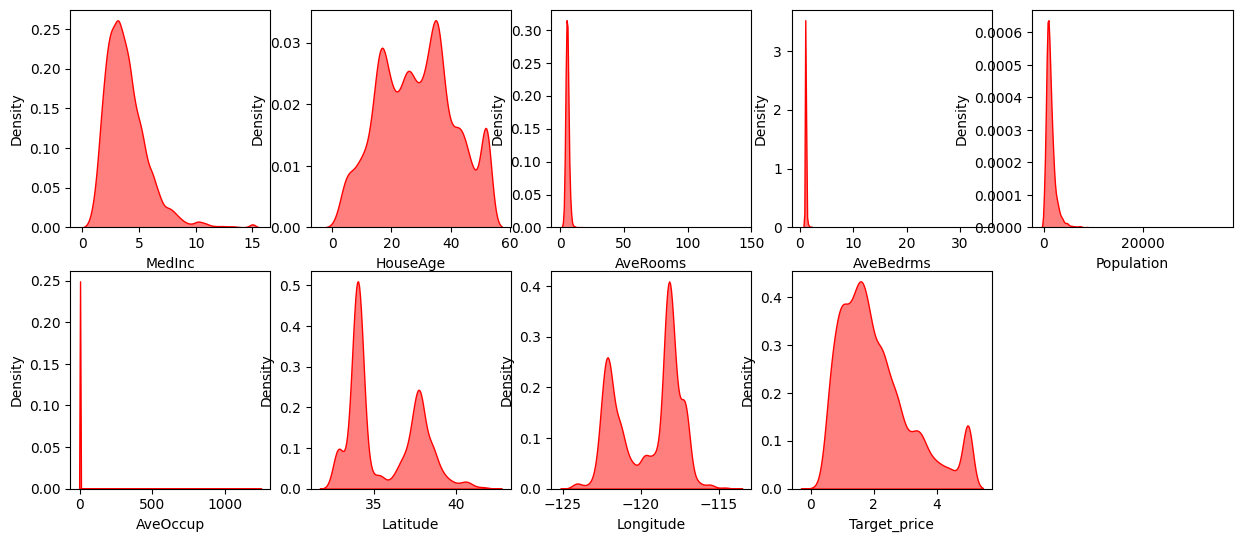

In [14]:
plt.figure(figsize=(15, 13))
for i in range(0, len(df.columns)):
    plt.subplot(4, 5, i + 1)
    sns.kdeplot(x=df[df.columns[i]], fill=True,color='red', alpha=0.5)
plt.show()

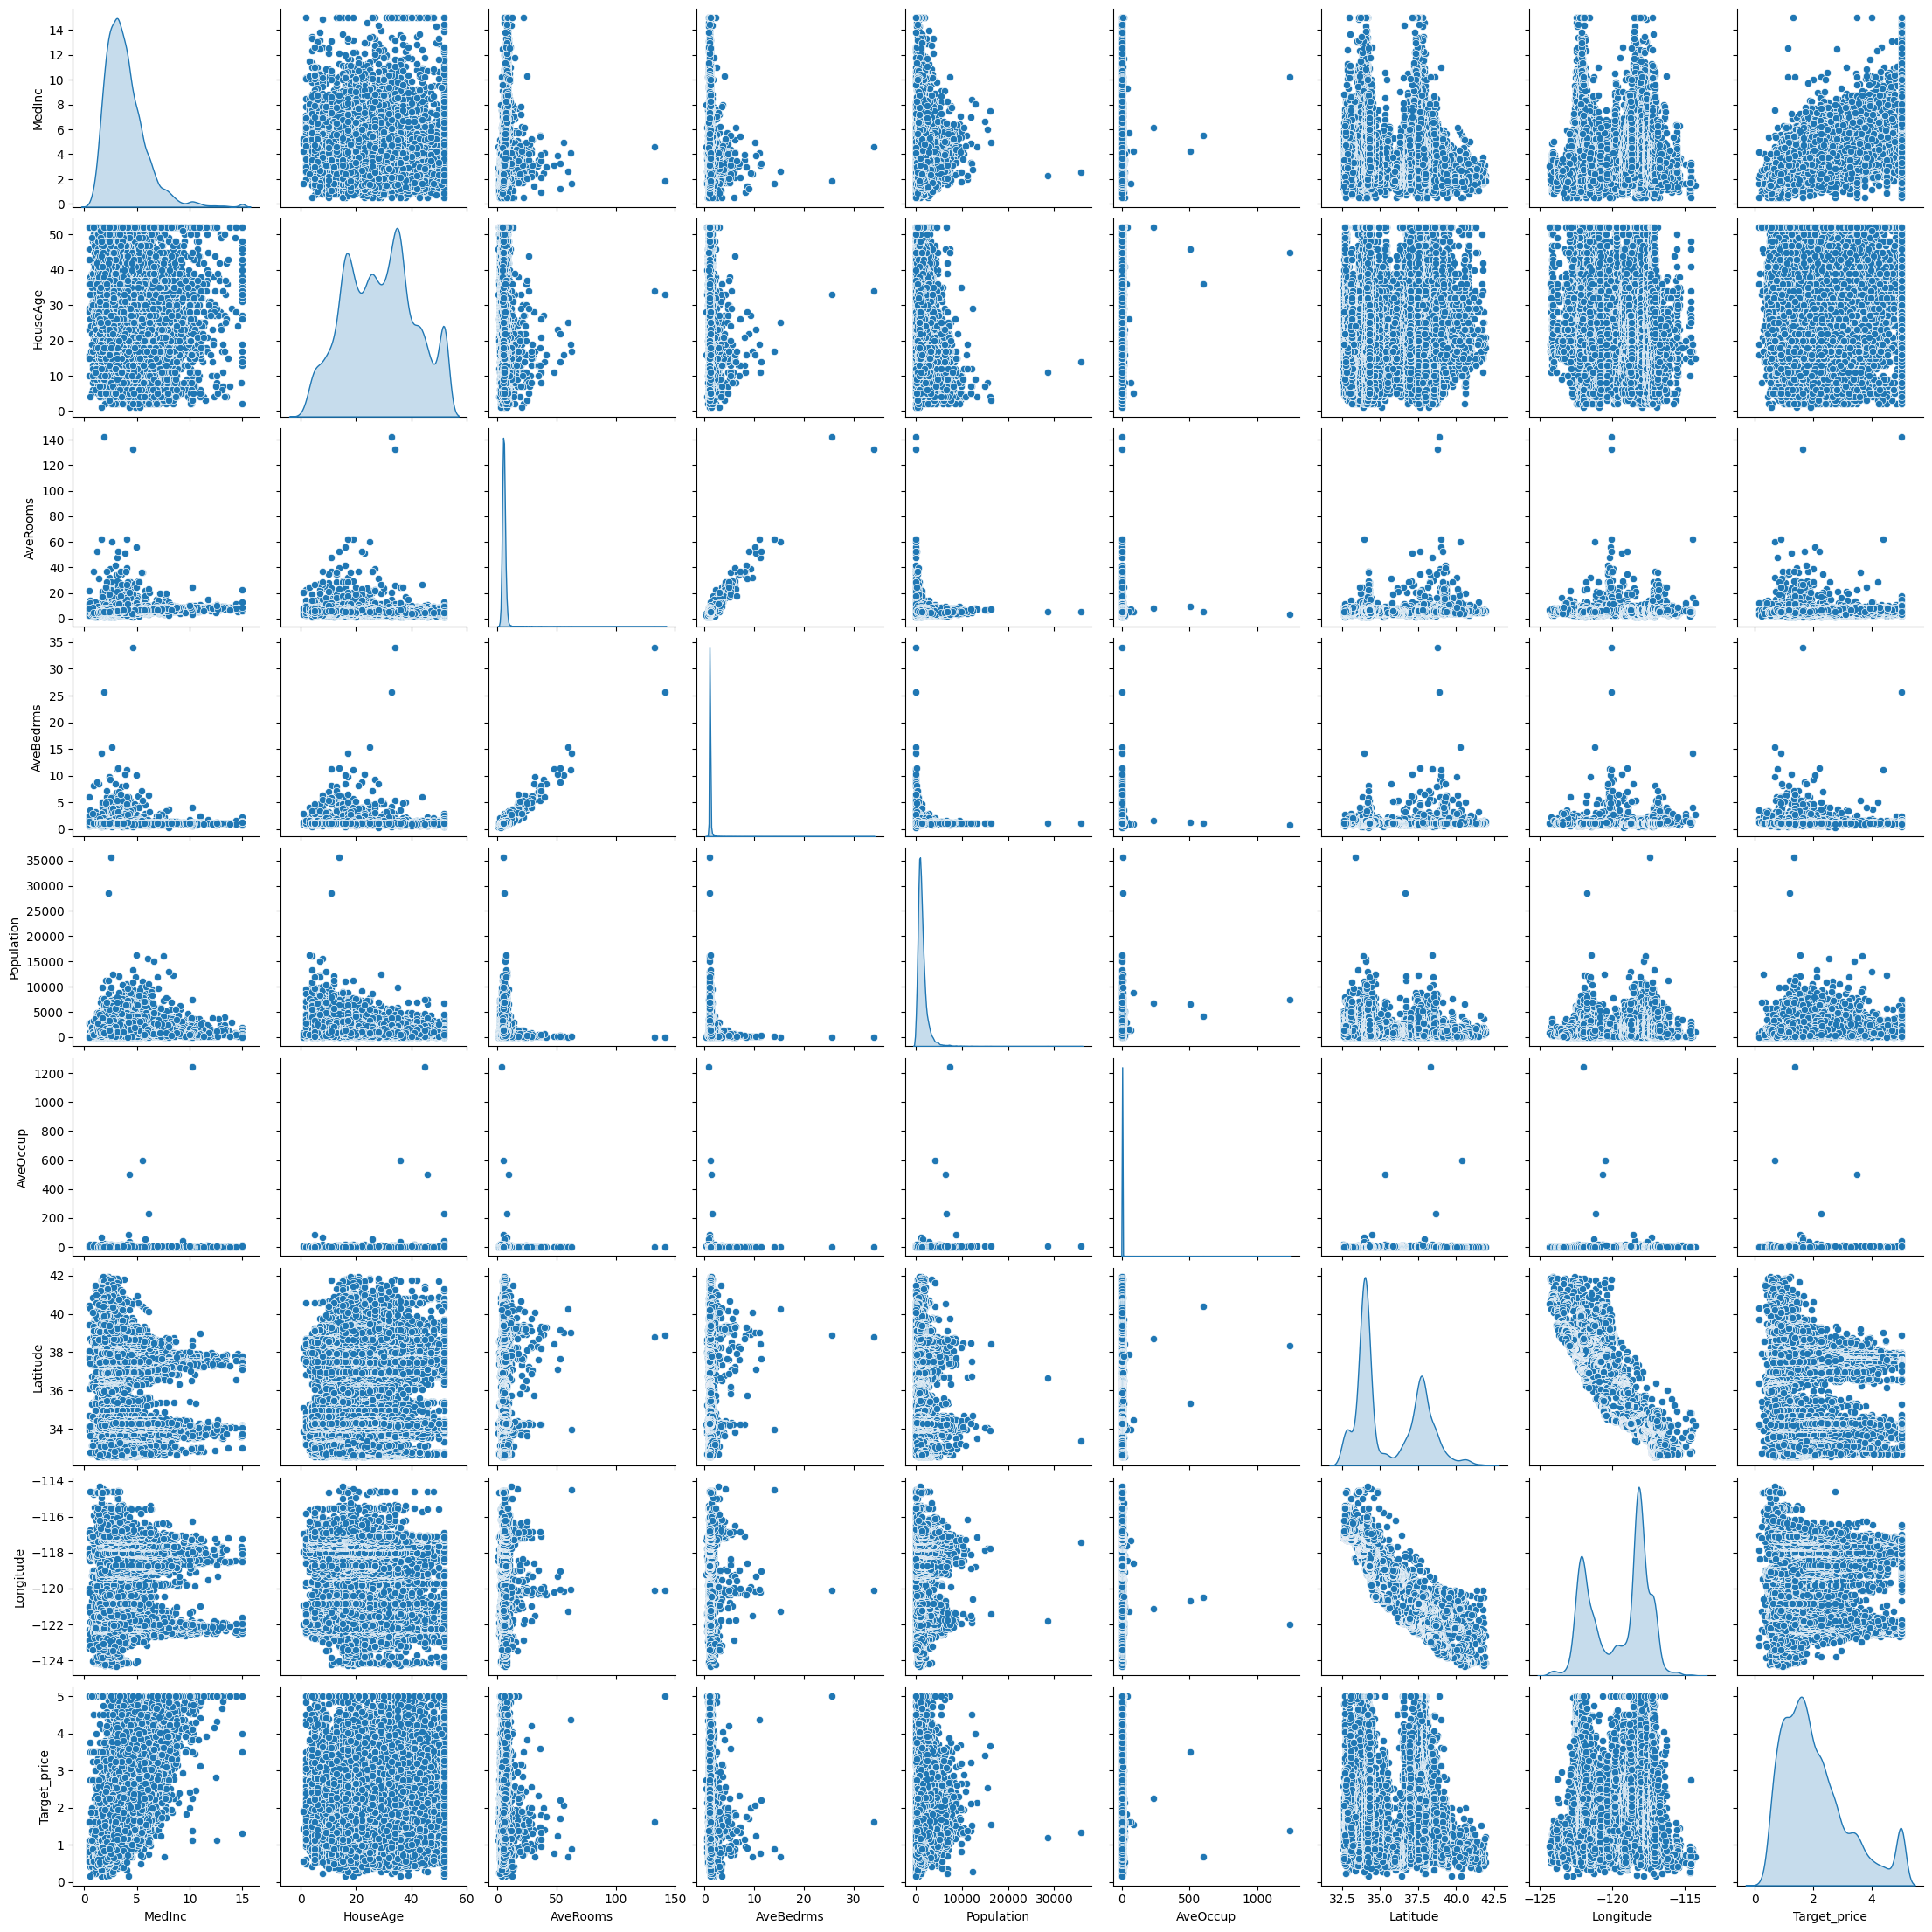

In [15]:

sns.pairplot(df, markers='o',diag_kind='kde', palette='coolwarm')

Removing outlier

In [16]:
def clean_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [17]:

for column in df.columns:
    cleaned_df = clean_outliers(df, column)

In [18]:
cleaned_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
decission_regressor=DecisionTreeRegressor()
X=cleaned_df.drop('Target_price',axis=1)
y=cleaned_df['Target_price']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14676, 8), (4893, 8), (14676,), (4893,))

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['squared_error', 'absolute_error'],
              'max_depth': [None, 5,8,10,12, 15,17,20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],  
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
              'ccp_alpha': [0.0, 0.01, 0.1, 0.2],

              }

grid_search = GridSearchCV(estimator=decission_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [22]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


,estimator,DecisionTreeRegressor()
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...], 'criterion': ['squared_error', 'absolute_error'], 'max_depth': [None, 5, ...], 'max_features': ['auto', 'sqrt', ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [23]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0}

In [24]:
y_pred=grid_search.predict(X_test)

In [25]:
y_pred

array([0.77345455, 0.93756   , 3.3504    , ..., 2.81993333, 1.19186452,
       1.271125  ], shape=(4893,))

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.399507720569306
Mean Squared Error: 0.32206656926991095
R^2 Score: 0.6484412758012881


In [27]:
joblib.dump(grid_search, 'decision_tree_regressor_model.joblib')

['decision_tree_regressor_model.joblib']